In [284]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
print(titanic_train.head())
titanic_temp = titanic_train.copy()
titanic_test_temp = titanic_test.copy()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


* PassengerId : 승객 고유 ID 번호
* Survived : 생존 여부 (0: 사망, 1: 생존)
* Pclass : 티켓 클래스 (1: 1등석, 2: 2등석, 3: 3등석)
* Name : 승객의 이름
* Sex : 승객의 성별 (male: 남성, female: 여성)
* Age : 승객의 나이 (단위: 년)
* SibSp	: 동승한 형제자매(Siblings)와 배우자(Spouse)의 수
* Parch	: 동승한 부모(Parents)와 자녀(Children)의 수
* Ticket : 티켓 번호
* Fare : 티켓 요금 (단위: 영국 파운드)
* Cabin	: 객실 번호
* Embarked : 탑승한 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

In [285]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### pclass와 생존율의 관계

<Axes: xlabel='Pclass', ylabel='Survived'>

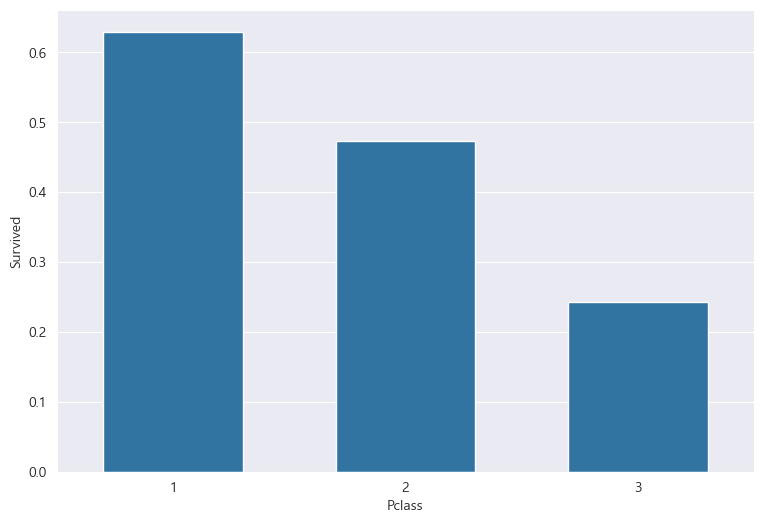

In [286]:
survived_to_pclass = titanic_temp.groupby('Pclass')['Survived'].mean().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=survived_to_pclass, width=0.6)

* Pclass가 높을 수록(1일수록) 평균 생존율이 높음

### 나이 데이터 체크


<Axes: xlabel='Age', ylabel='Count'>

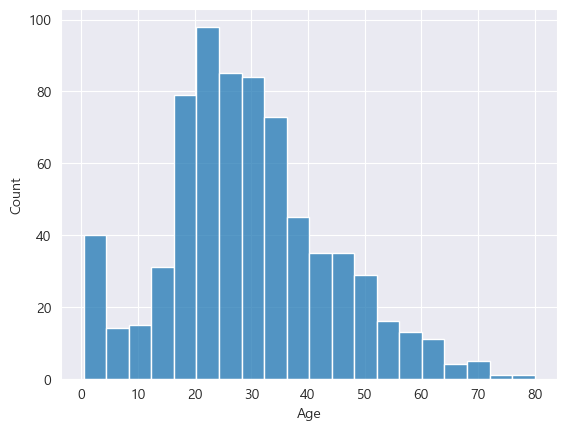

In [287]:
sns.histplot(x = 'Age', data=titanic_train)

<Axes: xlabel='Age'>

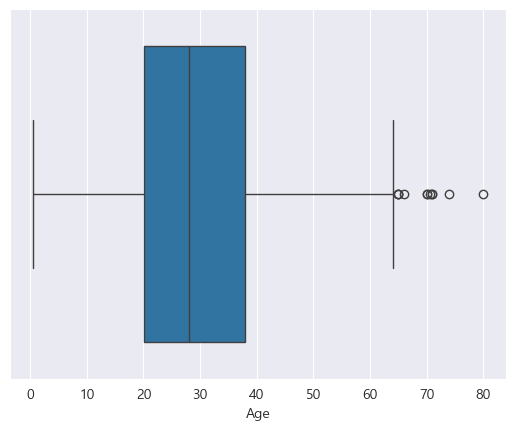

In [288]:
sns.boxplot(x = 'Age', data=titanic_train)

* 60대 이상은 별로 없다.

# 결측치 처리
* 나이 결측치 처리
    1. 나이 데이터 분포 확인
    2. 정규분포를 따른다면 정규분포 내에서 무작위 값으로 대체
    3. 따르지 않으면 다른 변수와의 관계를 파악

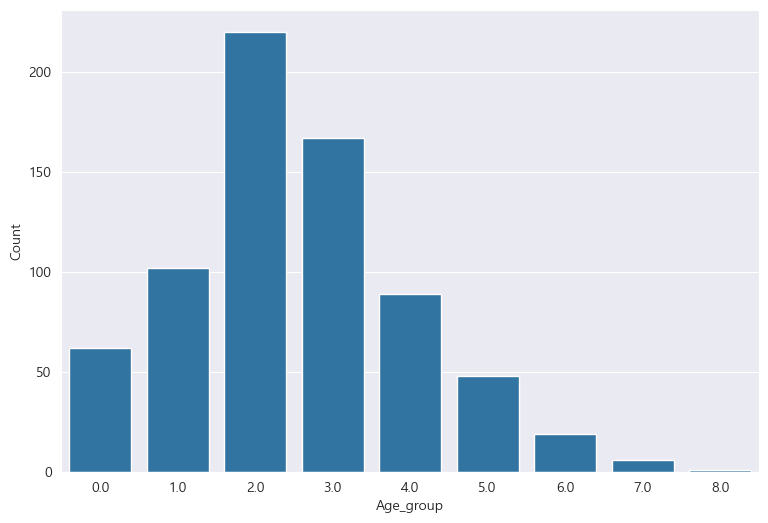

In [289]:
plt.figure(figsize = (9,6))
titanic_temp['Age_group'] = (titanic_temp['Age']//10)
num_age = titanic_temp['Age_group'].value_counts().reset_index()
num_age.columns = ['Age_group', 'Count']
sns.barplot(x = 'Age_group', y='Count' ,data=num_age)
plt.show()

* 정규 분포가 아님
* 다른 변수와 나이 변수의 관계를 확인

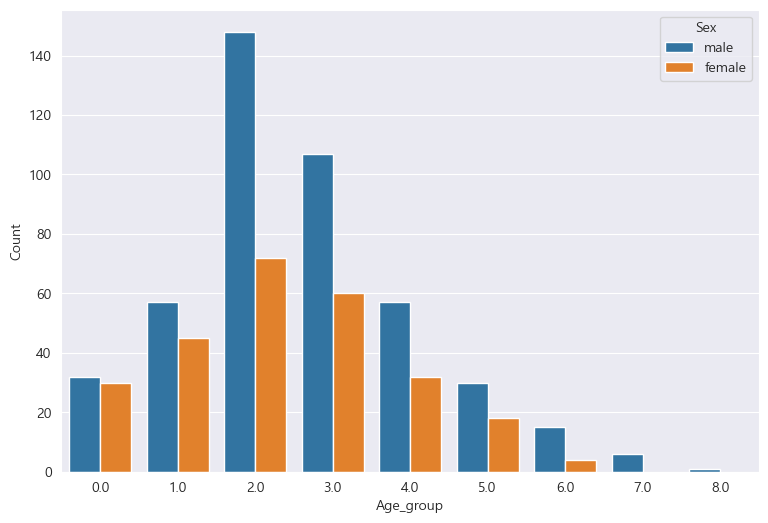

In [290]:
sex_to_age_group_num = titanic_temp.groupby('Age_group')['Sex'].value_counts().reset_index(name='Count')
plt.figure(figsize = (9,6))
sns.barplot(x='Age_group', y='Count', hue='Sex', data=sex_to_age_group_num)
plt.show()

* 성별에 따라 분포가 달라지지는 않음

<Axes: xlabel='Age_group', ylabel='Count'>

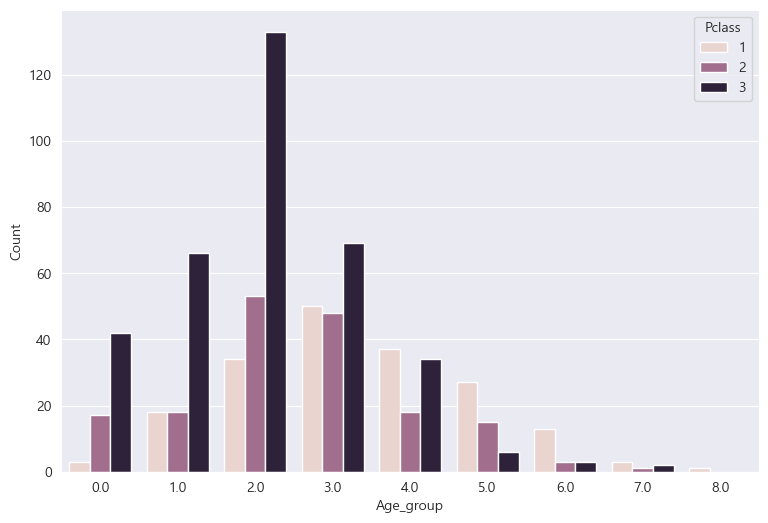

In [291]:
pclass_to_age_group_num = titanic_temp.groupby('Age_group')['Pclass'].value_counts().reset_index(name='Count')
plt.figure(figsize = (9,6))
sns.barplot(x='Age_group', y='Count', hue='Pclass'  ,data = pclass_to_age_group_num)

* 클래스가 높을수록 나이가 많은 승객의 비중이 큼

### 나이대 별 평균 가족 수

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family_Size, dtype: float64


<Axes: xlabel='Age_group', ylabel='Count'>

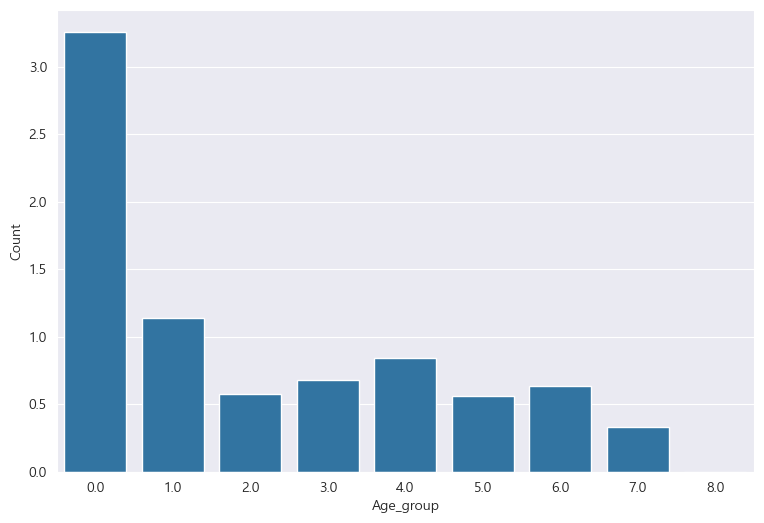

In [292]:
titanic_temp['Family_Size'] = titanic_temp['SibSp'] + titanic_temp['Parch']
print(titanic_temp['Family_Size'].describe())
family_to_age_group = titanic_temp.groupby('Age_group')['Family_Size'].mean().reset_index(name='Count')
plt.figure(figsize = (9,6))
sns.barplot(x='Age_group', y='Count', data = family_to_age_group)

* 나이가 어릴 수록 함께 온 가족 수가 많다.
* 평균적으로 1명에 가까운 동반자가 있지만 데이터가 비대칭이기 때문에 신뢰하기는 힘들어 보인다.

### 나이 결측치 처리
* 결측치인 값의 pclass를 확인
* 같은 pclass인 다른 행에서 랜덤한 값을 가져와서 할당
* pclass에 따른 나이의 데이터 분포를 유지함

In [293]:
titanic_age_pclass = titanic_temp[['Age', 'Pclass']]
for i in titanic_age_pclass[titanic_age_pclass['Age'].isnull()].index:
    Pclass = titanic_age_pclass.loc[i,'Pclass']
    age_to_pclass_not_null = titanic_age_pclass[(titanic_age_pclass['Pclass'] == Pclass) & (titanic_age_pclass['Age'].notnull())]['Age']
    random_age = np.random.choice(age_to_pclass_not_null)
    titanic_age_pclass.loc[i,'Age'] = random_age
titanic_temp['Age'] = titanic_age_pclass['Age']
titanic_train['Age'] = titanic_age_pclass['Age']
print(titanic_train.isnull().sum())
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 나이의 데이터 상태를 다시 체크

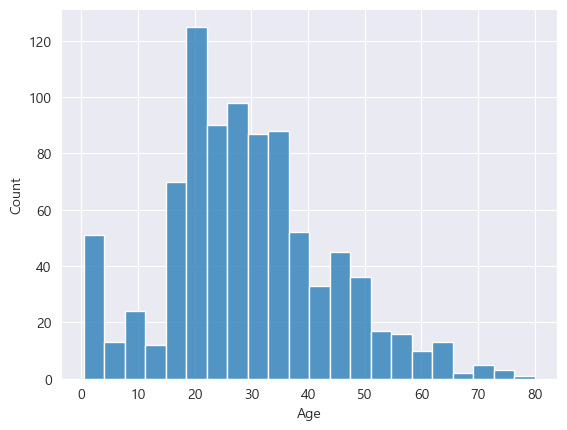

In [294]:
sns.histplot(x='Age', data=titanic_train)
plt.show()

<Axes: xlabel='Age_group', ylabel='Count'>

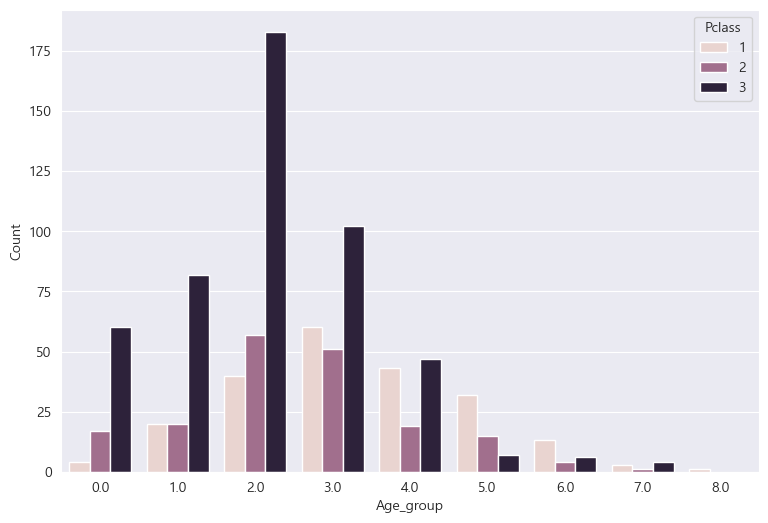

In [295]:
titanic_temp['Age_group'] = (titanic_temp['Age']//10)
pclass_to_age_group_num = titanic_temp.groupby('Age_group')['Pclass'].value_counts().reset_index(name='Count')
plt.figure(figsize = (9,6))
sns.barplot(x='Age_group', y='Count', hue='Pclass'  ,data = pclass_to_age_group_num)

* 데이터의 분포가 거의 변하지 않으면서 결측치를 채움
### test 데이터도 같은 작업 진행

In [296]:
titanic_age_pclass_test = titanic_test_temp[['Age', 'Pclass']]
for i in titanic_age_pclass_test[titanic_age_pclass_test['Age'].isnull()].index:
    Pclass = titanic_age_pclass_test.loc[i,'Pclass']
    age_to_pclass_not_null = titanic_age_pclass_test[(titanic_age_pclass_test['Pclass'] == Pclass) & (titanic_age_pclass_test['Age'].notnull())]['Age']
    random_age = np.random.choice(age_to_pclass_not_null)
    titanic_age_pclass_test.loc[i,'Age'] = random_age
titanic_test_temp['Age'] = titanic_age_pclass_test['Age']
titanic_test['Age'] = titanic_age_pclass_test['Age']
print(titanic_test.isnull().sum())
    

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Cabin 데이터는 생존여부를 예측하는데 영향을 끼칠 것 인가?

77.10437710437711
687


<Axes: xlabel='Deck', ylabel='Rate'>

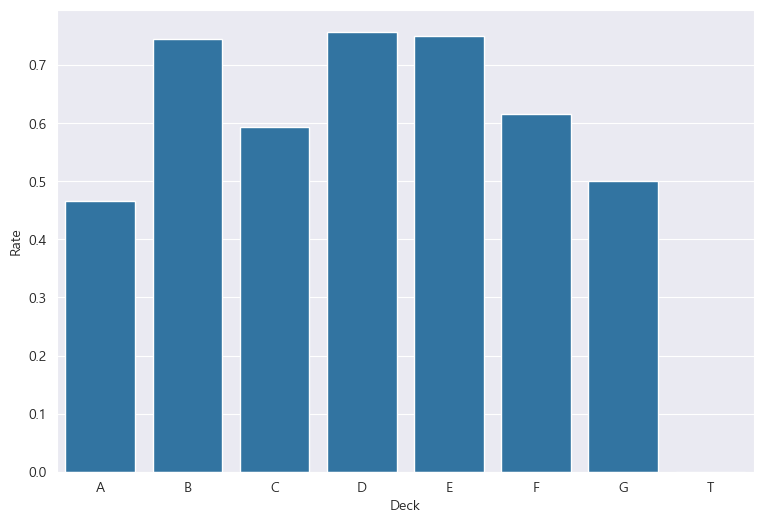

In [297]:
print(titanic_temp['Cabin'].isnull().mean()*100)
titanic_temp['Deck'] = titanic_temp['Cabin'].str[0]
titanic_test_temp['Deck'] = titanic_test_temp['Cabin'].str[0]
print(titanic_temp['Deck'].isnull().sum())
survived_to_Deck = titanic_temp.groupby('Deck')['Survived'].mean().reset_index(name='Rate')
plt.figure(figsize = (9,6))
sns.barplot(x = 'Deck', y = 'Rate', data = survived_to_Deck)


* 중간에 해당하는 갑판이 가장 높은 생존율을 보임
### pclass별 어느 갑판에 객실이 있었는지 조회

Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
dtype: int64


<Axes: xlabel='Deck', ylabel='Count'>

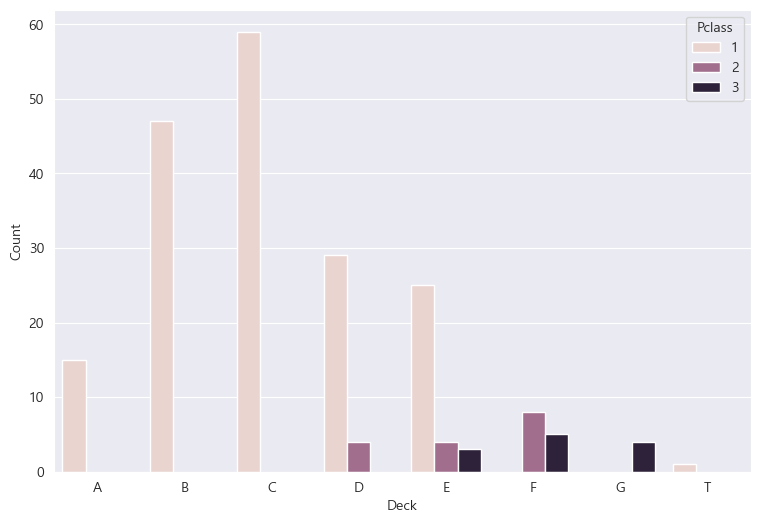

In [298]:
print(titanic_temp.groupby(['Deck', 'Pclass']).size())
pclass_to_deck = titanic_temp.groupby(['Deck', 'Pclass']).size().reset_index(name='Count')
plt.figure(figsize = (9,6))
sns.barplot(x = 'Deck', y = 'Count', hue='Pclass', data = pclass_to_deck)

* pclass가 높을수록 빠른 알파벳의 갑판에 호실이 있었다.
* 결측치를 랜덤으로 채운 후 에도 생존율의 변화가 없는지 체크

In [299]:
titanic_deck_pclass = titanic_temp[['Deck', 'Pclass']]
for i in titanic_deck_pclass[titanic_deck_pclass['Deck'].isnull()].index:
    Pclass = titanic_deck_pclass.loc[i,'Pclass']
    deck_to_pclass_not_null = titanic_deck_pclass[(titanic_deck_pclass['Pclass'] == Pclass) & (titanic_deck_pclass['Deck'].notnull())]['Deck']
    random_deck = np.random.choice(deck_to_pclass_not_null)
    titanic_deck_pclass.loc[i,'Deck'] = random_deck
titanic_temp['Deck'] = titanic_deck_pclass['Deck']
print(titanic_temp.isnull().sum())
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_group        0
Family_Size      0
Deck             0
dtype: int64


In [300]:
titanic_deck_pclass_test = titanic_test_temp[['Deck', 'Pclass']]
for i in titanic_deck_pclass_test[titanic_deck_pclass_test['Deck'].isnull()].index:
    Pclass = titanic_deck_pclass_test.loc[i,'Pclass']
    deck_to_pclass_not_null = titanic_deck_pclass_test[(titanic_deck_pclass_test['Pclass'] == Pclass) & (titanic_deck_pclass_test['Deck'].notnull())]['Deck']
    random_deck = np.random.choice(deck_to_pclass_not_null)
    titanic_deck_pclass_test.loc[i,'Deck'] = random_deck
titanic_test_temp['Deck'] = titanic_deck_pclass_test['Deck']
print(titanic_test_temp.isnull().sum())
    

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Deck             0
dtype: int64


In [301]:
print(titanic_train['Embarked'].isnull().mean()*100)

0.22446689113355783


* Embarked의 널값은 0.2%정도 이기에 무시해도 될 것으로 보임


### 갑판에 따른 생존율 다시 체크

<Axes: xlabel='Deck', ylabel='Rate'>

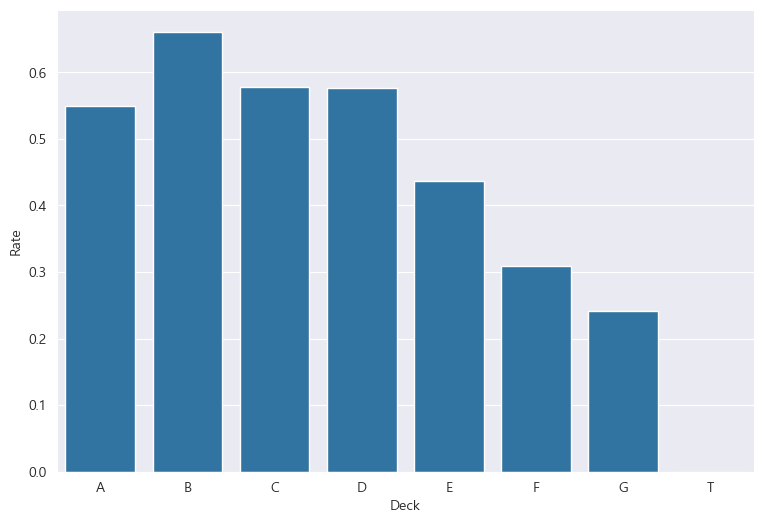

In [302]:
survived_to_Deck = titanic_temp.groupby('Deck')['Survived'].mean().reset_index(name='Rate')
plt.figure(figsize = (9,6))
sns.barplot(x = 'Deck', y = 'Rate', data = survived_to_Deck)


* pclass가 높을 수록 높은 갑판에 있었음
* pclass가 높을 수록 생존율이 높음
* 높은 갑판일수록 생존율이 높을 것임
* 전처리된 데이터를 믿어도 될 것으로 보임
* A는 왜 낮앗을까?

    ### 생존율에 영향을 미칠 것으로 생각되는 컬럼
1. Pclass
2. Sex
3. Age
4. SibSp
5. Parch
6. Fare
7. Deck
8. Embarked

<Axes: xlabel='Sex', ylabel='Rate'>

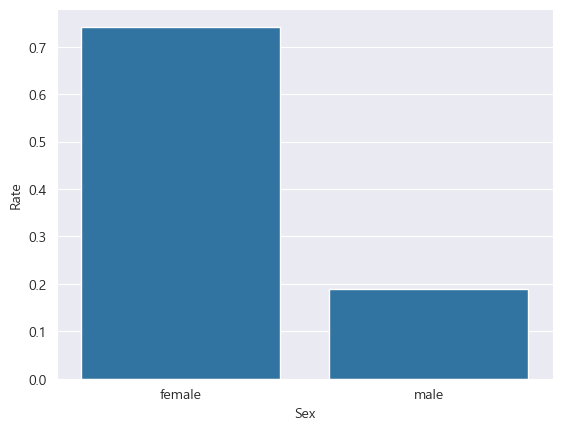

In [303]:
survived_to_sex = titanic_temp.groupby('Sex')['Survived'].mean().reset_index(name='Rate')
sns.barplot( x = 'Sex', y= 'Rate', data = survived_to_sex)

* 여자일수록 생존율이 높음

Age_group
0.0     81
1.0    122
2.0    280
3.0    213
4.0    109
5.0     54
6.0     23
7.0      8
8.0      1
Name: Survived, dtype: int64


<Axes: xlabel='Age_group', ylabel='Rate'>

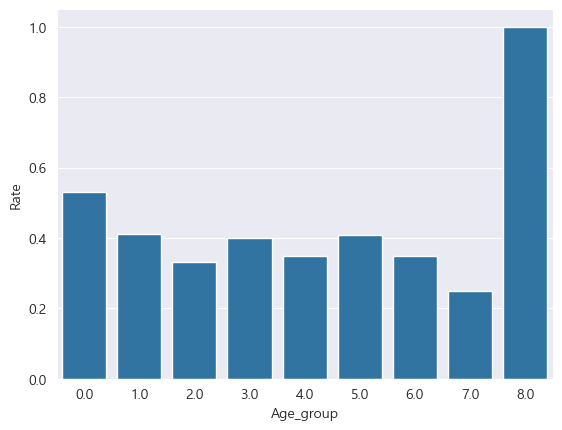

In [304]:
print(titanic_temp.groupby('Age_group')['Survived'].count())
survived_to_Age = titanic_temp.groupby('Age_group')['Survived'].mean().reset_index(name='Rate')
sns.barplot (x='Age_group', y ='Rate', data = survived_to_Age)

* 어린이의 생존율이 높았음
* 노인은 표본이 적어 생존율을 판단하기 부적절함

Family_Size
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64


<Axes: xlabel='Family_Size', ylabel='Rate'>

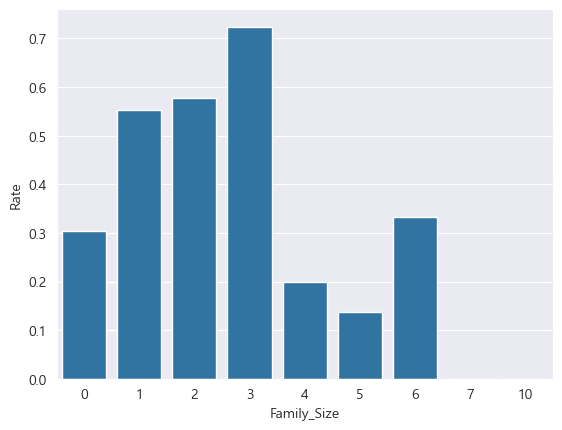

In [305]:
print(titanic_temp.groupby('Family_Size')['Survived'].count())
survived_to_Family = titanic_temp.groupby('Family_Size')['Survived'].mean().reset_index(name='Rate')
sns.barplot(x='Family_Size', y= 'Rate', data = survived_to_Family)

* 혼자 탄 인원의 생존율이 보통 낮음

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '(0.0, 50.0]'),
  Text(1, 0, '(50.0, 100.0]'),
  Text(2, 0, '(100.0, 150.0]'),
  Text(3, 0, '(150.0, 200.0]'),
  Text(4, 0, '(200.0, 250.0]'),
  Text(5, 0, '(250.0, 300.0]'),
  Text(6, 0, '(300.0, 350.0]'),
  Text(7, 0, '(350.0, 400.0]'),
  Text(8, 0, '(400.0, 450.0]'),
  Text(9, 0, '(450.0, 500.0]'),
  Text(10, 0, '(500.0, 550.0]')])

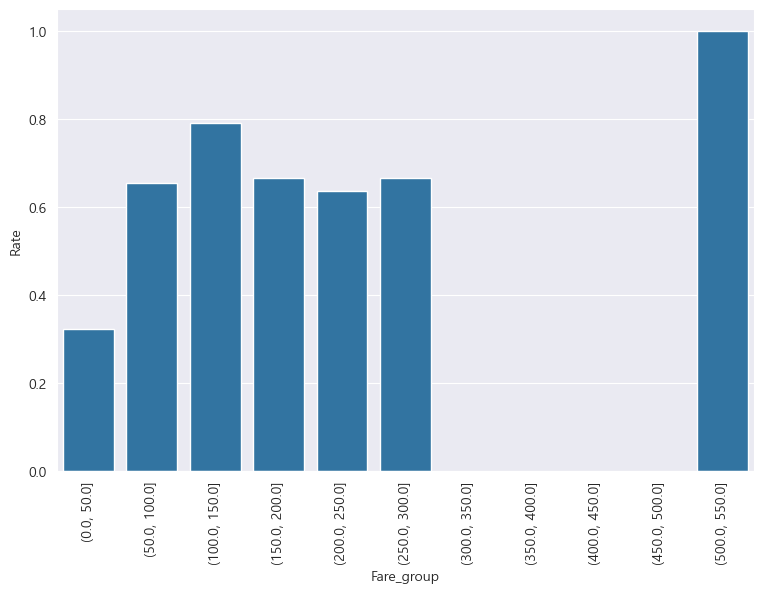

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic_temp['Fare_group'] = pd.cut(titanic_temp['Fare'], bins=np.arange(0, titanic_temp['Fare'].max()+50, 50))
survived_to_Fare_group = titanic_temp.groupby('Fare_group', observed=True)['Survived'].mean().reset_index(name='Rate')
plt.figure(figsize=(9,6))
sns.barplot(x='Fare_group', y='Rate', data=survived_to_Fare_group)
plt.xticks(rotation=90)

* 대체적으로 운임비용을 많이 냈으면 생존율이 높아짐
### 항구 별 평균 생존율

<Axes: xlabel='Embarked', ylabel='Rate'>

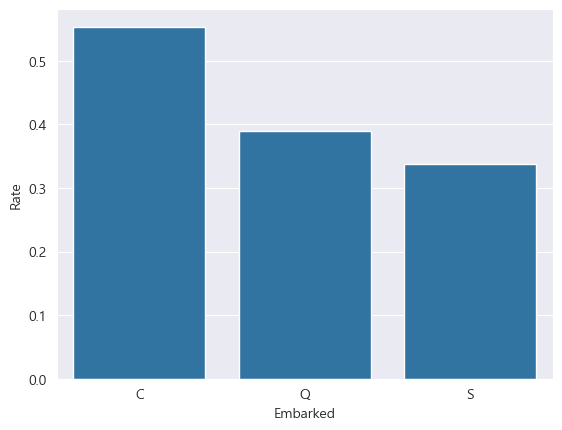

In [307]:
survived_to_Embarked = titanic_temp.groupby('Embarked')['Survived'].mean().reset_index(name='Rate')
sns.barplot(x='Embarked', y='Rate', data=survived_to_Embarked)


* C Q S 순으로 생존율이 높음
### Fare와 Embarked의 관계

<Axes: xlabel='Age', ylabel='Fare'>

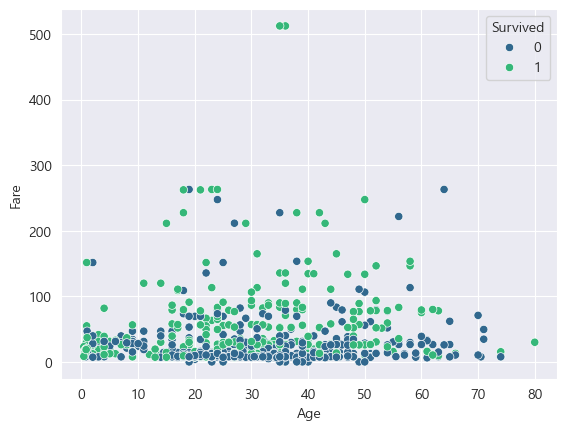

In [308]:
sns.scatterplot(x='Age', y='Fare', data=titanic_temp, hue='Survived', palette='viridis')

* 20~30대에 손님이 가장 많았으며 운임비용이 높을 수록 많이 생존했음

<Axes: >

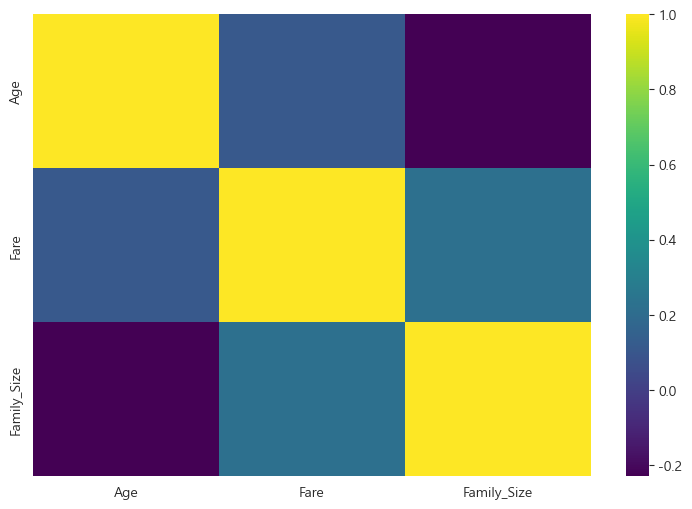

In [309]:
titanic_heatmap_test = titanic_temp[['Age', 'Fare', 'Family_Size']]
corr = titanic_heatmap_test.corr()
plt.figure(figsize = (9,6))
sns.heatmap(corr, cmap='viridis')

* 전반적으로 상관관계가 낮음

In [310]:
titanic_test_temp.drop('Cabin', axis=1, inplace=True)
titanic_test_temp.dropna(inplace=True)
titanic_temp.drop(['Cabin', 'Age_group', 'Fare_group','Family_Size'], axis=1, inplace=True)
titanic_temp.dropna(inplace=True)

print(titanic_temp.isnull().sum())
print(titanic_test_temp.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64


In [311]:
titanic_train = titanic_temp
titanic_test = titanic_test_temp
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())
titanic_train.to_csv('titanic_processed_train.csv', index=False)
titanic_test.to_csv('titanic_processed_test.csv', index=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64


### 결과요약
1. 여자일수록 생존율이 높음
2. 돈을 많이 썻을수록 생존율이 높음
3. 어릴수록 생존율이 높음